# Testing Kinetics Models

In [3]:
import tellurium as te

## Background
Consider a linear pathway consisting of three species ``S1``, ``S2``, and ``S3``. We initialize ``S1`` to 10. We expect ``S2`` to increase as ``S1`` decreases and then ``S3`` to increase; we  should end up with ``S3 = 10``. Below is an attempt at implementing this model.

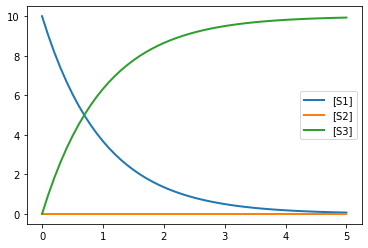

In [10]:
INCORRECT_MODEL = '''
S1 -> S2; k1*S1  
S2 -> S3; k2*S1

S1 = 10
k1 = 1; k2 = 1
'''
rr = te.loada(INCORRECT_MODEL)
data = rr.simulate()
rr.plot(data)

Although the final value of ``S3`` is correct, ``S2`` remains 0 throughout. Clearly, there is an error in the model.

Looking carefully at the Antimony model, we see there is a typographical error in the kinetics law for the second reaction. The kinetics law incorrectly references ``S1`` instead of ``S2``. Below is the corrected model.

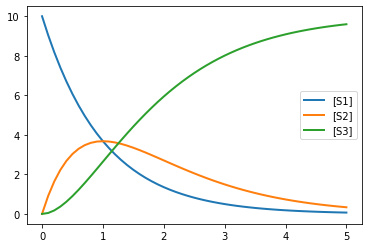

In [11]:
CORRECT_MODEL = '''
S1 -> S2; k1*S1  
S2 -> S3; k2*S2

S1 = 10
k1 = 1; k2 = 1;
'''
rr = te.loada(CORRECT_MODEL)
data = rr.simulate()
rr.plot(data)

Although the example is simple, it demonstrates how easy it is to make mistakes in the construction of models, especially complex models. A few mistakes can be detected by tellurium, such as misspelling a variable. However, substituting one variable for another is not detected and, if not corrected, will cause the simulation to produce incorrect results.

Testing is the process by which we detect errors in simulations.
1. Types of testing: validation, verification. Focus on verification.
1. Types of verification testing: static, dynamic

## Static Testing
1. Reactions have two parts, a **mass trasfer** expression and a **kinetics law**.
2. 